<a href="https://colab.research.google.com/github/MianUsmanAhmed12/Assignment2/blob/main/data_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""This is the python notebook for generating insights from data to know if there is any bias"""
import pandas as pd

In [ ]:
#read the csv file.
dataset = pd.read_csv('london-stop-and-search.csv')

/Users/mianusmanahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
#We will display the first five rows of data to get the rough idea of what data looks like.
dataset.head().transpose()

,0,1,2,3,4
Type,Person search,Person search,Person search,Person search,Person and Vehicle search
Date,2015-03-02T16:40:00+00:00,2015-03-02T16:40:00+00:00,2015-03-02T18:45:00+00:00,2015-03-02T19:15:00+00:00,2015-03-03T15:50:00+00:00
Part of a policing operation,NaN,NaN,NaN,NaN,NaN
Policing operation,NaN,NaN,NaN,NaN,NaN
Latitude,NaN,NaN,NaN,NaN,NaN
Longitude,NaN,NaN,NaN,NaN,NaN
Gender,Male,Male,Male,Male,Male
Age range,25-34,25-34,25-34,over 34,25-34
Self-defined ethnicity,Asian or Asian British - Bangladeshi (A3),Asian or Asian British - Bangladeshi (A3),White - Any other White ethnic background (W9),White - White British (W1),White - White British (W1)
Officer-defined ethnicity,Asian,Asian,White,White,White


In [ ]:
#print the lenght of dataset
print(len(dataset))

302623


In [ ]:
#we will drop the dublicates if there are any in dataset
dataset = dataset.drop_duplicates()

In [ ]:
#We will check the length of dataset after dropping dublicates to know if any were present,
print(len(dataset))

290858


In [ ]:
#now we will get list of names of columns to know what features we have in the dataset.
dataset.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [ ]:
#"Part of policing operation" was showing nan when we saw the first five rows, so we will see how many unique values it has. 
dataset['Part of a policing operation'].unique()

array([nan, False], dtype=object)

In [ ]:
#"policing operation" was also showing nan when we saw the first five rows, so we will see how many unique values it has. 
dataset['Policing operation'].unique()

array([nan])

In [ ]:
#Since both the columns have only nan values, so these are not useful for us, so we will drop the columns. 
dataset.drop(columns=['Part of a policing operation', 'Policing operation'], inplace= True)

In [ ]:
#Next, lets see the unique values in Type and Gender to see the doversity here
print(dataset['Type'].unique())
print(dataset['Gender'].unique())

['Person search' 'Person and Vehicle search' 'Vehicle search']
['Male' 'Female' nan 'Other']


In [ ]:
#We will see what age group is stopped and searched most in both males and females, So we will group Gender and Age range column
dataset_grouped1 = dataset.groupby(['Gender', 'Age range'])['Date'].count().unstack(fill_value=0)

In [ ]:
dataset_grouped1.head()

Age range,10-17,18-24,25-34,over 34,under 10
Gender,,,,,
Female,3117,6298,4563,4028,12
Male,49426,105912,61337,41950,70
Other,18,36,25,19,1


In [ ]:
#We will see what UK police find when they stopped and searced people. we will check this gender wise. 
dataset_grouped2 = dataset.groupby(['Gender', 'Object of search'])['Date'].count().unstack(fill_value=0)
dataset_grouped2.head().transpose()

Gender,Female,Male,Other
Object of search,,,
Anything to threaten or harm anyone,44,517,0
Article for use in theft,17,264,0
Articles for use in criminal damage,4506,68729,28
Controlled drugs,8666,119911,48
Evidence of offences under the Act,0,3,0
Firearms,137,1806,2
Fireworks,0,2,0
Offensive weapons,1,104,0
Stolen goods,100,843,0


In [ ]:
#Next, we will see the proportion of ethnic groups who are being stopped and searched.
dataset_grouped3 = dataset.groupby(['Gender', 'Self-defined ethnicity'])['Date'].count().unstack(fill_value=0)
dataset_grouped3.head().transpose()

Gender,Female,Male,Other
Self-defined ethnicity,,,
Asian or Asian British - Any other Asian ethnic background (A9),495,15386,6
Asian or Asian British - Bangladeshi (A3),165,10123,5
Asian or Asian British - Indian (A1),222,5341,1
Asian or Asian British - Pakistani (A2),155,5422,0
Black or Black British - African (B2),823,29459,15
Black or Black British - Any other Black ethnic background (B9),1653,31551,12
Black or Black British - Caribbean (B1),1259,24584,5
Chinese or other ethnic group - Any other ethnic group (O9),403,6172,2
Chinese or other ethnic group - Chinese (O1),51,546,0


In [ ]:
# we will see how officer defined ethnicity is different from self defined ethnicity.
dataset_grouped4 = dataset.groupby(['Gender', 'Officer-defined ethnicity'])['Date'].count().unstack(fill_value=0)
dataset_grouped4.head().transpose()

Gender,Female,Male,Other
Officer-defined ethnicity,,,
Asian,1305,40873,16
Black,5098,106525,41
Mixed,0,1,0
Other,265,8347,1
White,11811,112327,57


In [ ]:
dataset_grouped5 = dataset.groupby('Officer-defined ethnicity')['Date'].count()
dataset_grouped5.head().transpose()

Officer-defined ethnicity
Asian     42301
Black    111849
Mixed         1
Other      8626
White    124472
Name: Date, dtype: int64

In [ ]:
#We will check the stop and search percentage of Asian and Blacks (BAME) by UK plice
(dataset_grouped5['Asian'].sum() + dataset_grouped5['Black'].sum())/ dataset_grouped5.sum()

0.5366424252129686

In [ ]:
#We will see the what is the outcome when people are stopped and searched.
dataset.groupby('Outcome')['Date'].count()

Outcome
Article found - Detailed outcome unavailable        57
Local resolution                                  2186
Nothing found - no further action               197991
Offender cautioned                                 334
Offender given drugs possession warning          25156
Offender given penalty notice                     5388
Suspect arrested                                 57869
Suspect summonsed to court                        1877
Name: Date, dtype: int64

In [ ]:
#We will make a separate variable for "nothing found" value to know how many poeple was stopped and searched but UK police found nothing.
no_outcome = dataset[dataset['Outcome']== 'Nothing found - no further action']

In [ ]:
no_outcome.groupby('Officer-defined ethnicity')['Date'].count()

Officer-defined ethnicity
Asian    28959
Black    76600
Mixed        1
Other     5847
White    83980
Name: Date, dtype: int64

In [ ]:
#We will make separate column for Blacks and Asians to know more about the behavior of police with this minority group.
dataset['Bame'] = (dataset['Officer-defined ethnicity']=='Asian') | (dataset['Officer-defined ethnicity']=='Black')

In [ ]:
#We will make a separate column for no action to use it in our model.
dataset['noaction'] = (dataset['Outcome']=='Nothing found - no further action')

<AxesSubplot:xlabel='Bame'>

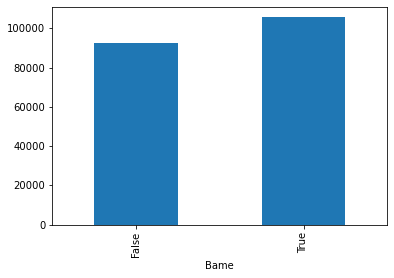

In [ ]:
#We will visualize the barplot for no action with respect to BAME to get better understanding. 
dataset[dataset['noaction']==True].groupby('Bame')['Date'].count().plot.bar()

In [ ]:
#We will see the no action feature  with officer defined ethnicity
dataset[dataset['noaction']==True].groupby('Officer-defined ethnicity')['Date'].count()

Officer-defined ethnicity
Asian    28959
Black    76600
Mixed        1
Other     5847
White    83980
Name: Date, dtype: int64

In [ ]:
#We will see the percentage of no action taken according to officer defined ethnicity
(dataset[dataset['noaction']==True].groupby('Officer-defined ethnicity')['Date'].count()) / dataset.groupby(['Officer-defined ethnicity'])['Date'].count()

Officer-defined ethnicity
Asian    0.684594
Black    0.684852
Mixed    1.000000
Other    0.677834
White    0.674690
Name: Date, dtype: float64

In [ ]:
#make a new csv file with updated features
dataset.to_csv('dataset.csv')

In [ ]:
#The below code is also given in .py foam name As Classifier.py

In [ ]:
''' This is the source code for modeling. Import the dataset.csv file and run the code in python IDE'''
#import the necessary libraries
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [ ]:
#read the dataset file
dataset = pd.read_csv('dataset.csv')

/Users/mianusmanahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
#remove unuseful columns, These columns were filled with nan values and some we do not need becasue of the problem statement we formulated 
dataset = dataset.drop(['Unnamed: 0', 'Date', 'Outcome', 'Outcome linked to object of search', 'Removal of more than just outer clothing', 'Longitude', 'Latitude'], axis = 1)

dataset['Bame'] = dataset['Bame']*1
dataset['noaction'] = dataset['noaction']*1

In [ ]:
#noaction is the output value we are going to predict, so we would separate it from input features.
X = dataset.drop(['noaction'], axis = 1)
# the noaction series is saved into output variable
y = dataset.noaction

In [ ]:
#fill the nan values with mode, The mode is the value that appears most often in a set of data values. 
#dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])
#dataset['Age range'] = dataset['Age range'].fillna(dataset['Age range'].mode()[0])
#dataset['Self-defined ethnicity'] = dataset['Self-defined ethnicity'].fillna(dataset['Self-defined ethnicity'].mode()[0])
#dataset['Officer-defined ethnicity'] = dataset['Officer-defined ethnicity'].fillna(dataset['Officer-defined ethnicity'].mode()[0])
#dataset['Object of search'] = dataset['Object of search'].fillna(dataset['Object of search'].mode()[0])
imp_mean = SimpleImputer(missing_values=np.nan,  strategy='constant', fill_value=X.mode())
X = imp_mean.fit_transform(X)

In [ ]:
#Most of the features are categorical so we will encode them to be fed into the model. Here Ordinal Encoder from sklearn library has been used. It encodes categorical features as an integer array.
oe = OrdinalEncoder()
X = oe.fit_transform(X)

In [ ]:
#Now we would Standardize features by removing the mean and scaling to unit variance. Sklearn provide StandardScalar library from preprocessing package
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [ ]:
#the dataset is split into train and test set using StratifiedShuffleSplit which is library for sklearn. It returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
sss = StratifiedShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [ ]:
#We would use Random Forest Classifier for classification. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
#n_estimators = 500
#max_depth=500
#random_state=0
#max_samples = 500
classifier = RandomForestClassifier( )
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#predict the test set
yhat = classifier.predict(X_test)

In [ ]:
#check the accuracy of model using different classification metric
print(f1_score(y_test, yhat, average="macro"))
print(recall_score(y_test, yhat, average="macro"))    
print(accuracy_score(y_test, yhat))

0.4223127420144768
0.5033546249313515
0.6780925531183387


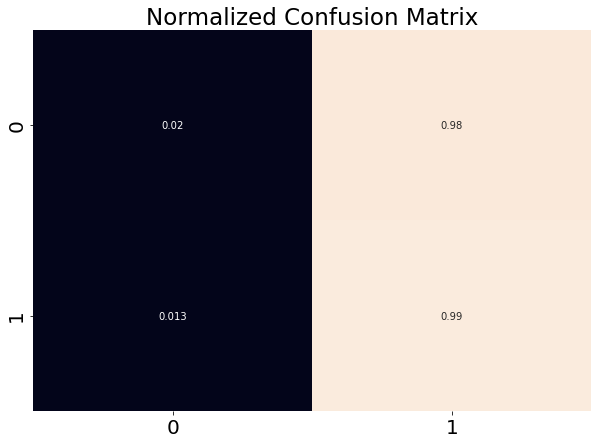

In [ ]:
#We will also use confusion matrix to visulaize the performance. Confusion matrix also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm.
cf_matrix = confusion_matrix(y_test, yhat, normalize='true')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
#we would get the feature importances to see the contribution of different features to machine learning model.
importances = list(zip(classifier.feature_importances_, dataset.columns))
importances.sort(reverse=True)

print(importances)

[(0.36547258459983145, 'Self-defined ethnicity'), (0.2653678778682377, 'Age range'), (0.11099479253301618, 'Type'), (0.0805654774494744, 'Legislation'), (0.06827866620372376, 'Object of search'), (0.04999235451528877, 'Officer-defined ethnicity'), (0.04353660518984461, 'Gender'), (0.015791641640583116, 'Bame')]


<AxesSubplot:>

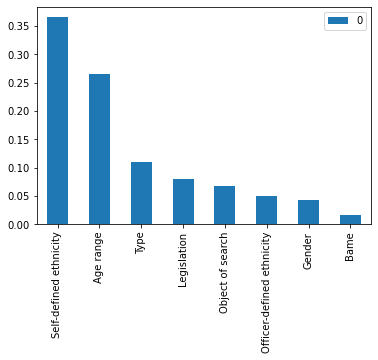

In [ ]:
#we would generate the barplot of feature importances to get better understanding of scores.
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')